In [1]:
import importlib
import ntuputils, trees
import numpy as np, os.path as osp, matplotlib.pyplot as plt

   INFO:2020-11-30 14:55:43:ntuputils:40 Using tqdm notebook


In [ ]:
@trees.clusterize_decorator
def merging_algo(node):
    trimmed_node = trees.trim_tree(node)
    for track in trees.traverse(node):
        # Tracks without a parent are the 'roots' of the decay tree
        if track.parent is None:
            track.merge = False
            continue

            dr = track.deltar(track.parent)

        if (
            dr > 0.1
            and (
                track.energy > 1.
                or (track.energy > 0.5 and track.energy / track.parent.energy > 0.3)
                )
            ):
            track.merge = False
        else:
            track.merge = True

   INFO:2020-12-01 12:10:56:ntuputils:17 Logger hgcalplot is already defined
   INFO:2020-12-01 12:10:56:ntuputils:40 Using tqdm notebook
   INFO:2020-12-01 12:10:56:ntuputils:161 Overwriting cache for <ntuputils.Dataset (1 root files) object at 0x1888856a0>


   INFO:2020-12-01 12:10:56:ntuputils:171 Cached ~677.6 kb (5 entries, 53 branches)
   INFO:2020-12-01 12:10:56:ntuputils:128 Using cache
   INFO:2020-12-01 12:10:56:trees:222 Adding <trees.Track 1 E=5269.00 (0.000,0.000,-0.000) pdgid=-13 at 0x1bb2307c0> as a root
   INFO:2020-12-01 12:10:56:trees:222 Adding <trees.Track 2 E=5269.00 (0.000,0.000,-0.000) pdgid=13 at 0x1bb2462b0> as a root



1 e=5269.00 CLUSTER

1 E=5269.00 pdg=-13 nhits=344 X
2 e=5269.00 CLUSTER
__139656 dr=0.03 efrac=0.00 e=0.04
__139659 dr=0.11 efrac=0.00 e=0.05
__141142 dr=0.13 efrac=0.00 e=0.86
____141149 dr=0.10 efrac=0.05 e=0.04
____141155 dr=0.27 efrac=0.03 e=0.02
____141156 dr=0.28 efrac=0.13 e=0.12
____142156 dr=0.16 efrac=0.13 e=0.11
______142207 dr=0.61 efrac=0.45 e=0.05
____142157 dr=0.04 efrac=0.04 e=0.04
____141429 dr=0.13 efrac=0.30 e=0.26
______141677 dr=0.07 efrac=0.11 e=0.03
______141678 dr=0.24 efrac=0.17 e=0.04
____141430 dr=0.13 efrac=0.20 e=0.18
__139663 dr=0.22 efrac=0.00 e=0.05
__139696 dr=1.91 efrac=0.00 e=0.29
__139710 dr=2.60 efrac=0.00 e=0.10
__139711 dr=2.65 efrac=0.00 e=0.49
____139714 dr=0.14 efrac=0.07 e=0.03
____139715 dr=0.12 efrac=0.28 e=0.14
____139718 dr=0.12 efrac=0.19 e=0.10
____139721 dr=0.82 efrac=0.02 e=0.01
____140068 dr=0.10 efrac=0.18 e=0.09
__139032 dr=0.06 efrac=0.00 e=0.19
__139033 dr=0.09 efrac=0.00 e=0.22
__33737 dr=0.61 efrac=0.00 e=0.05
__25404 dr=2.83 

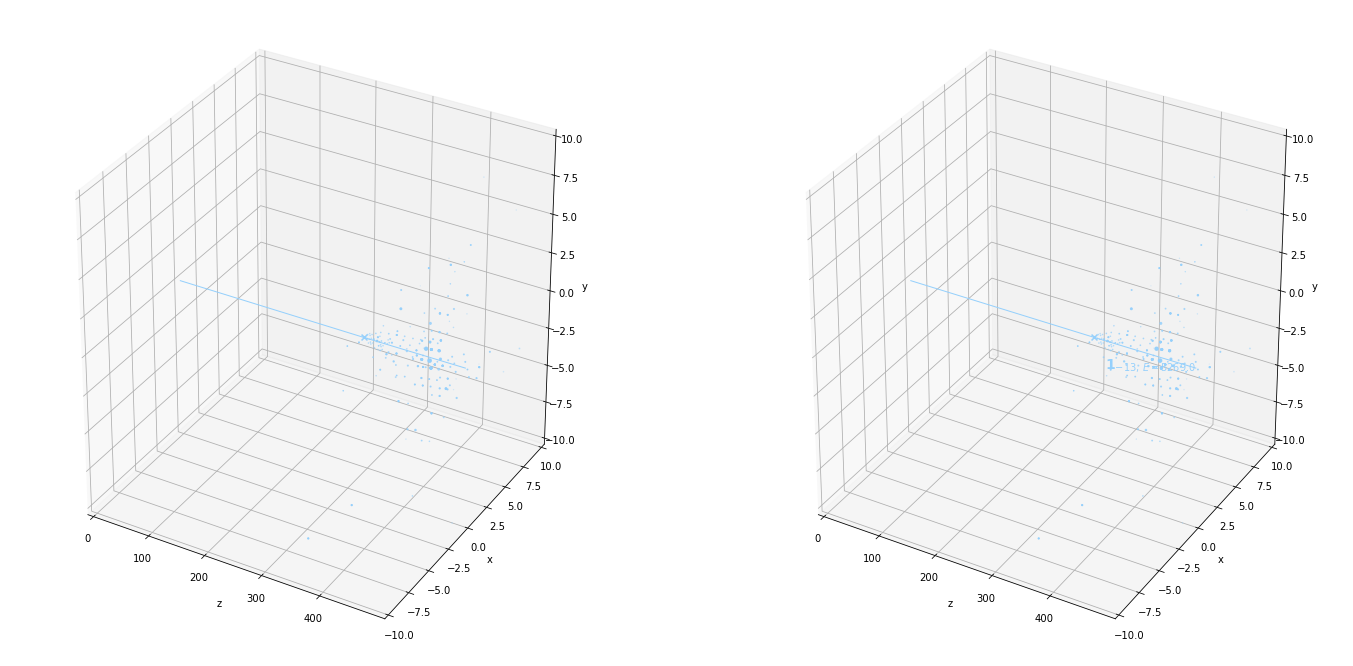

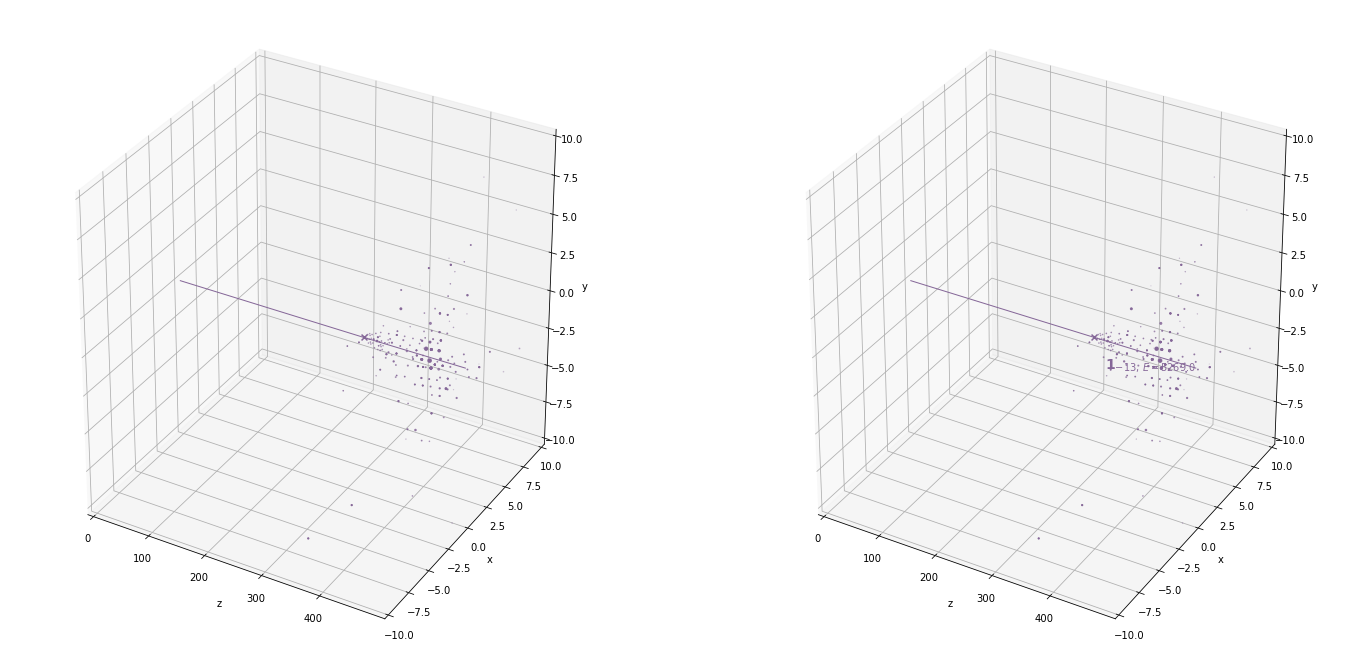

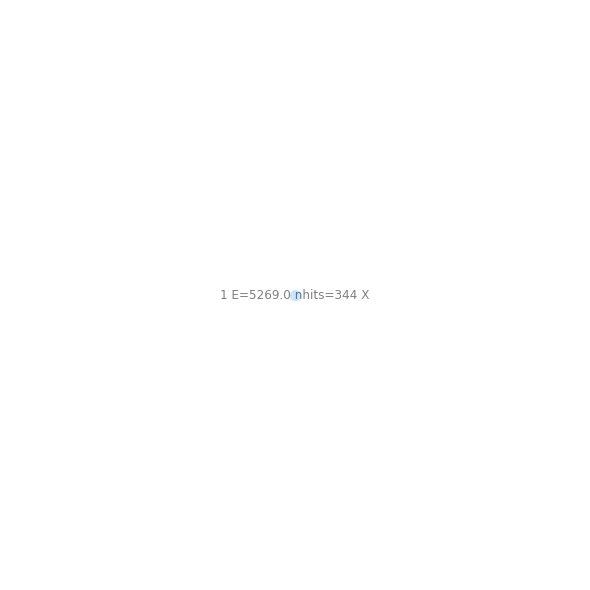

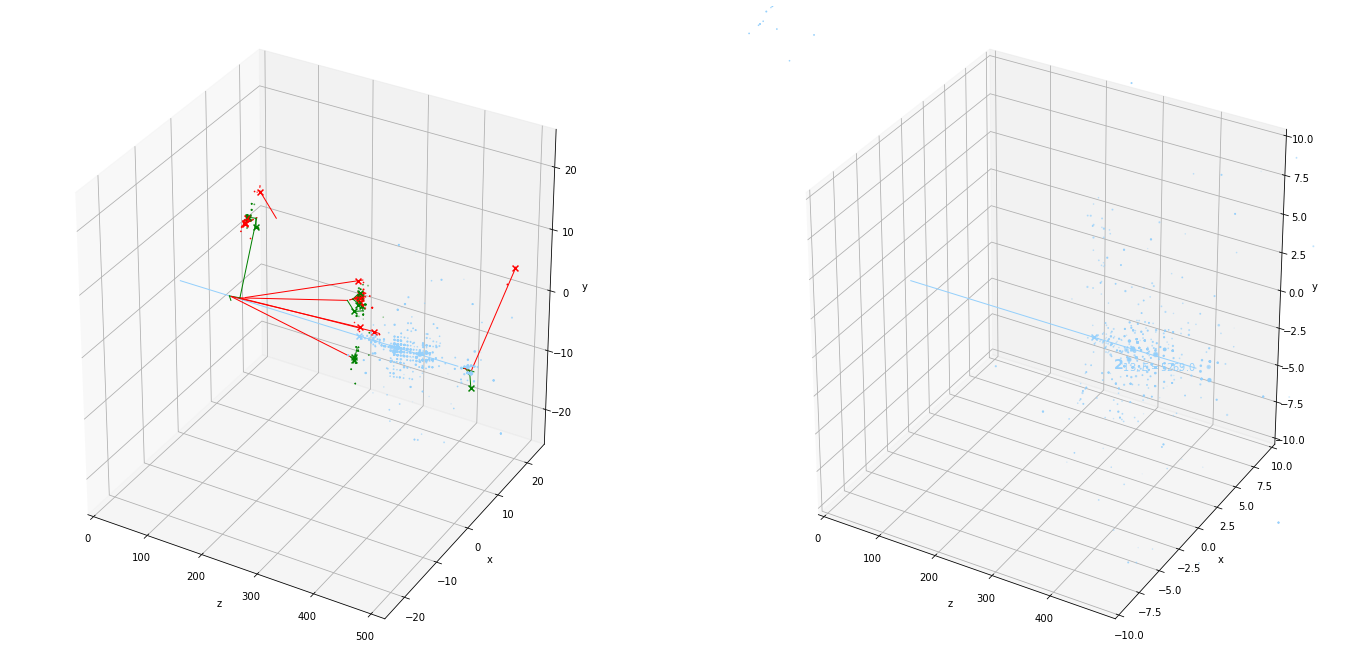

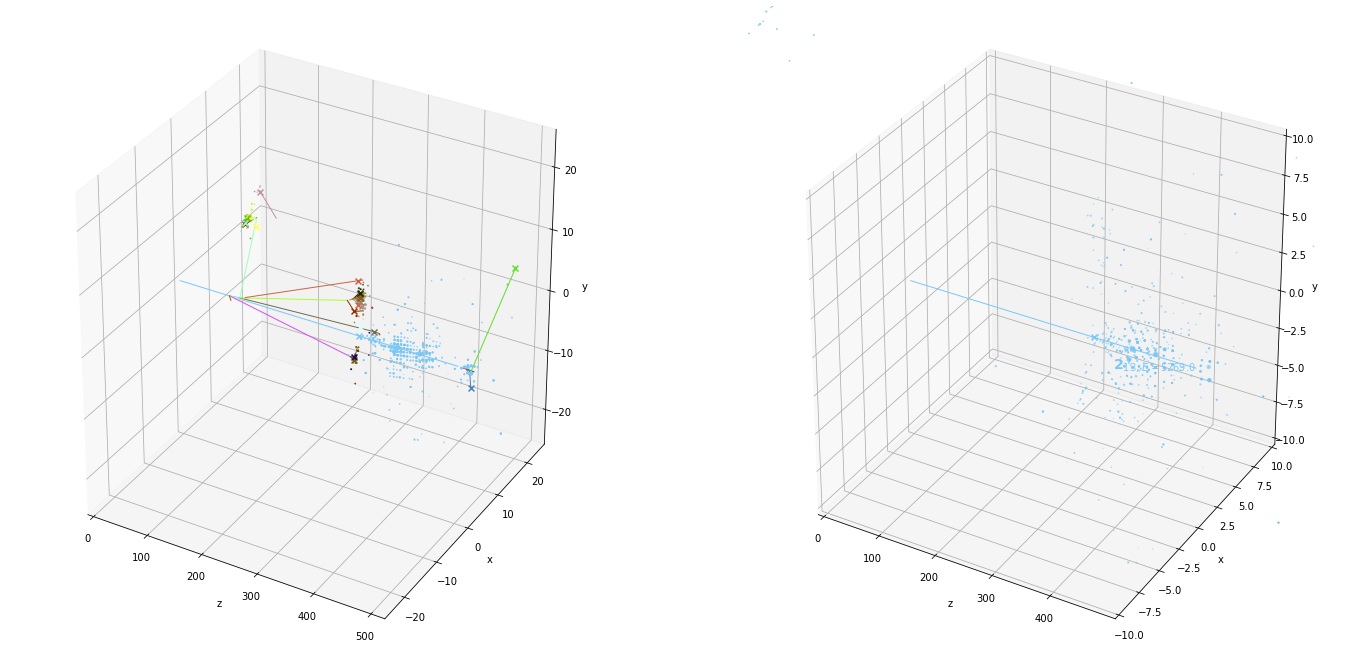

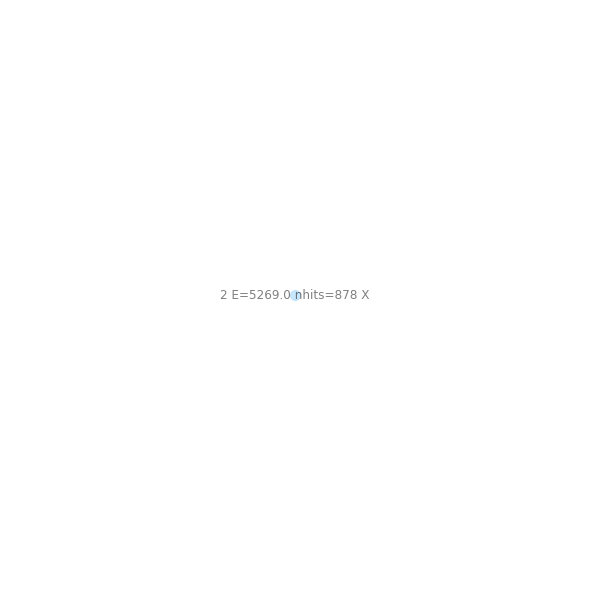

In [28]:
importlib.reload(ntuputils)
importlib.reload(trees)

event = ntuputils.get_event('event1009_pdgid13_1000GeV_Nov10_finecalo_numEvent5_numEvent5.root', i=0)
roots = trees.build_tree(event)

for root in roots:
    trimmed_root = trees.trim_tree(root)
    root_cluster = merging_algo(trimmed_root)

    trees.print_clustering(trimmed_root)
    print()
    trees.print_tree(root_cluster)

    fig = plt.figure(figsize=(24,12))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')
    fig2 = plt.figure(figsize=(24,12))
    ax3 = fig2.add_subplot(121, projection='3d')
    ax4 = fig2.add_subplot(122, projection='3d')

    trees.plot_node_rotated(root, labels=False, ax=ax1)
    trees.plot_node_rotated(root_cluster, labels=True, plot_clusters=True, ax=ax2)

    trees.plot_node_rotated(root, labels=False, ax=ax3, color_by_pdgid=False)
    trees.plot_node_rotated(root_cluster, labels=True, plot_clusters=True, ax=ax4, color_by_pdgid=False)

    trees.plot_graph(root_cluster)

   INFO:2020-12-01 12:11:42:ntuputils:161 Overwriting cache for <ntuputils.Dataset (1 root files) object at 0x18ebe3970>


   INFO:2020-12-01 12:11:42:ntuputils:171 Cached ~677.6 kb (5 entries, 53 branches)
   INFO:2020-12-01 12:11:42:ntuputils:128 Using cache


   INFO:2020-12-01 12:11:42:trees:222 Adding <trees.Track 1 E=5269.00 (0.000,0.000,-0.000) pdgid=-13 at 0x18889ecd0> as a root
   INFO:2020-12-01 12:11:42:trees:222 Adding <trees.Track 2 E=5269.00 (0.000,0.000,-0.000) pdgid=13 at 0x18889e790> as a root
   INFO:2020-12-01 12:11:43:trees:222 Adding <trees.Track 1 E=5476.07 (0.000,-0.000,0.000) pdgid=-13 at 0x18a2f7f40> as a root
   INFO:2020-12-01 12:11:43:trees:222 Adding <trees.Track 2 E=5476.07 (0.000,-0.000,0.000) pdgid=13 at 0x18ec52d00> as a root
   INFO:2020-12-01 12:11:43:trees:222 Adding <trees.Track 1 E=4498.24 (0.000,-0.000,0.000) pdgid=-13 at 0x18f95c7f0> as a root
   INFO:2020-12-01 12:11:43:trees:222 Adding <trees.Track 2 E=4498.24 (0.000,-0.000,0.000) pdgid=13 at 0x18f95c640> as a root
   INFO:2020-12-01 12:11:43:trees:222 Adding <trees.Track 1 E=3335.98 (0.000,-0.000,-0.000) pdgid=-13 at 0x18fee5a60> as a root
   INFO:2020-12-01 12:11:43:trees:222 Adding <trees.Track 2 E=3335.98 (0.000,-0.000,-0.000) pdgid=13 at 0x18fee58

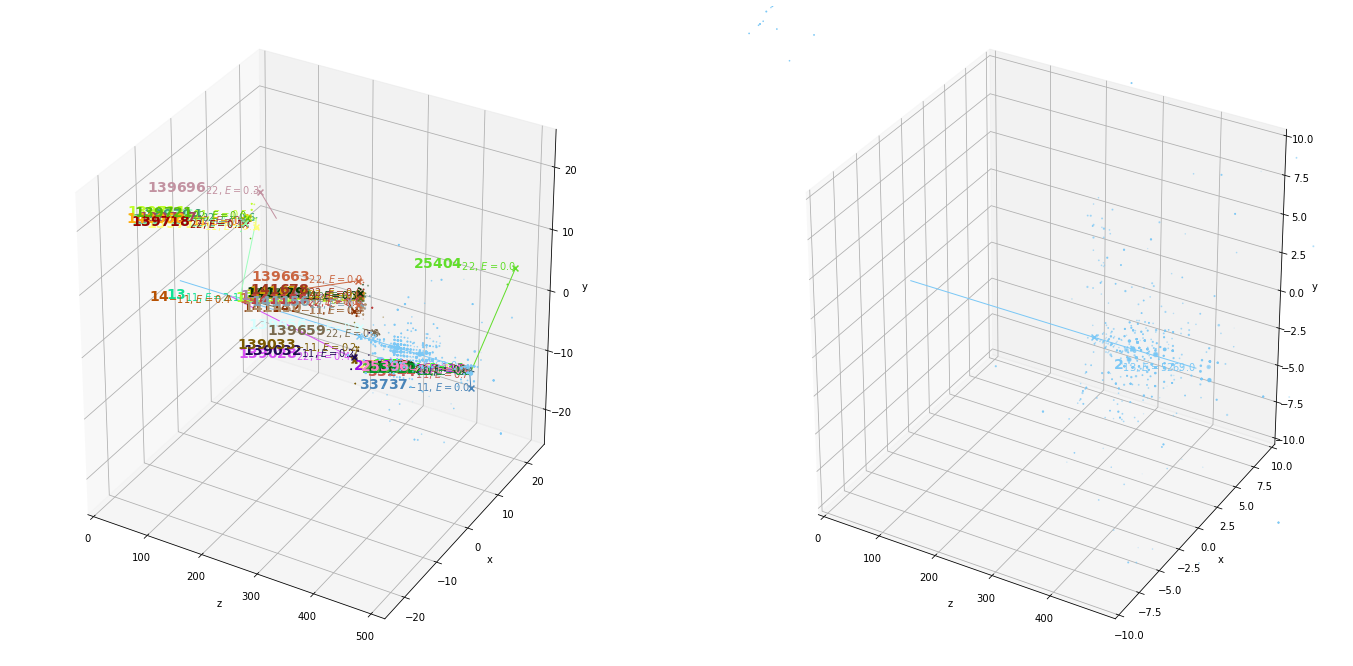

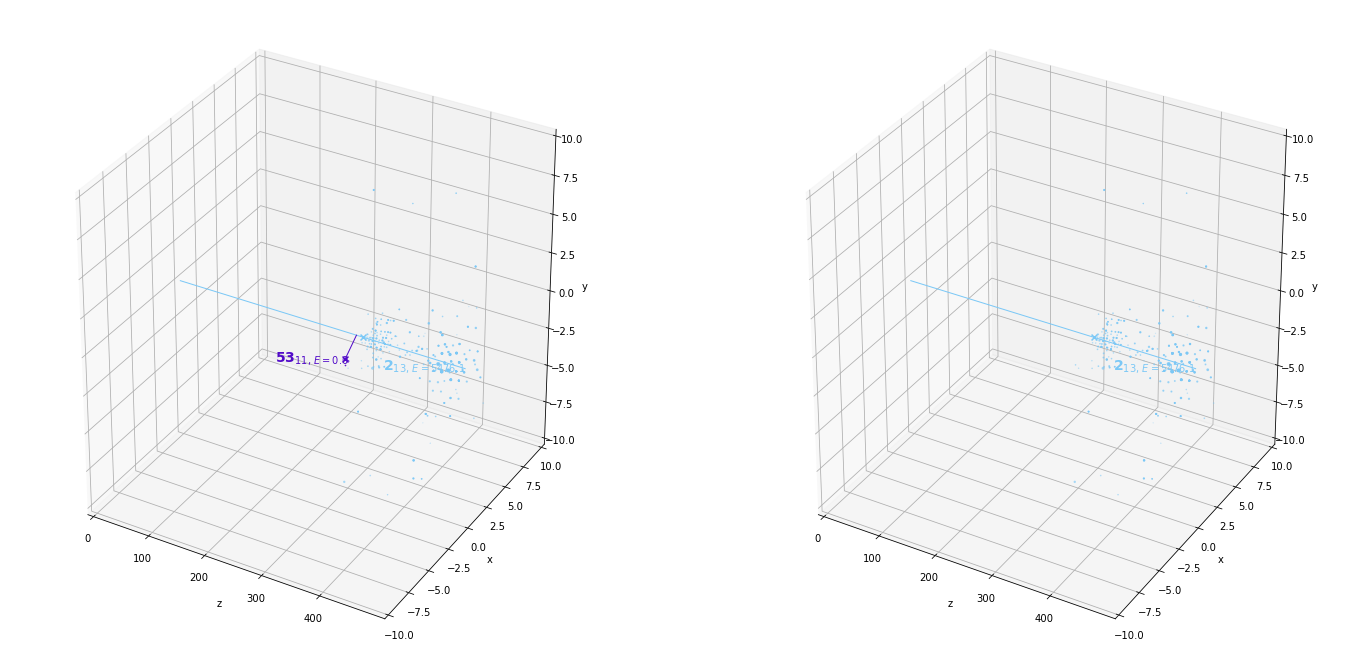

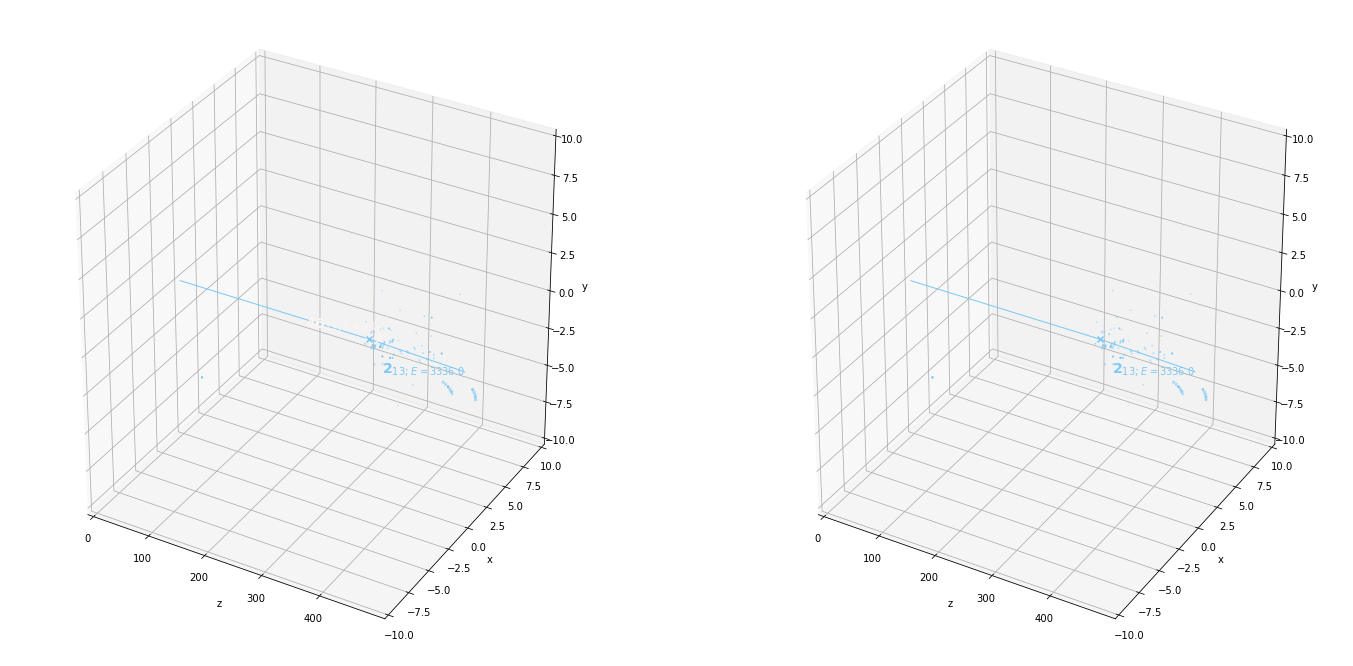

In [29]:
for event in ntuputils.iter_events('event1009_pdgid13_1000GeV_Nov10_finecalo_numEvent5_numEvent5.root'):
    roots = trees.build_tree(event)
    for root in roots:
        if not root.children: continue # Skip elementary events without any tracks
        trimmed_root = trees.trim_tree(root)
        root_cluster = merging_algo(trimmed_root)
        fig = plt.figure(figsize=(24,12))
        ax1 = fig.add_subplot(121, projection='3d')
        ax2 = fig.add_subplot(122, projection='3d')
        trees.plot_node_rotated(root, labels=True, ax=ax1, color_by_pdgid=False)
        trees.plot_node_rotated(root_cluster, labels=True, plot_clusters=True, ax=ax2, color_by_pdgid=False)

# pions

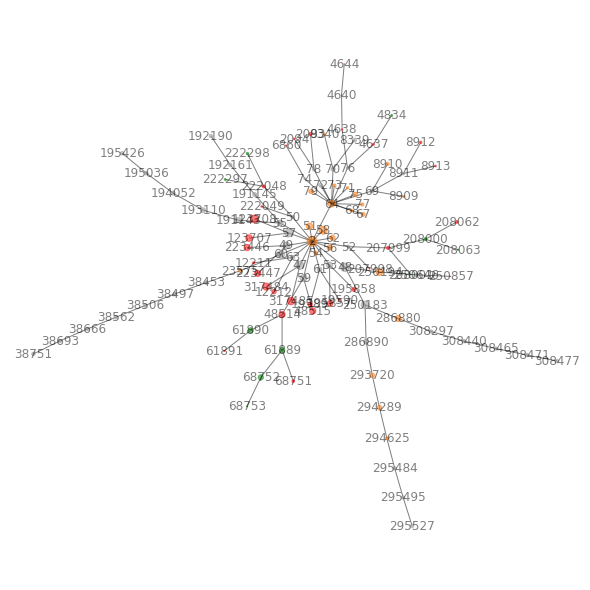

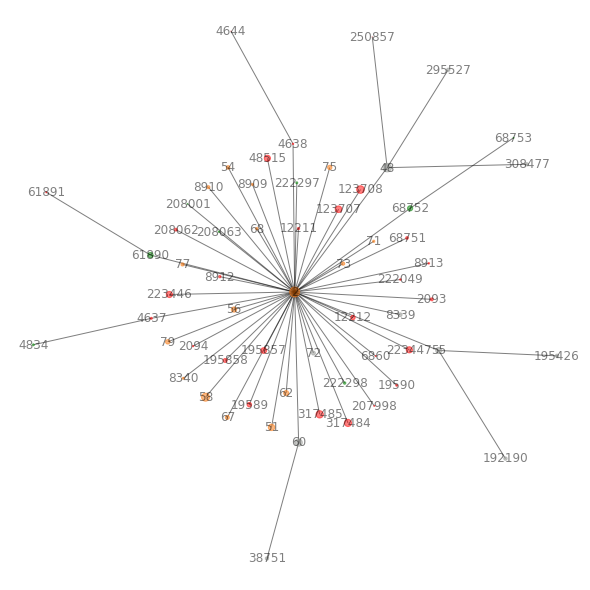

In [55]:
def do():
    importlib.reload(trees)
    
    from time import strftime
    import os
    outdir = strftime('plots_pions_%b%d')
    if not osp.isdir(outdir): os.makedirs(outdir)
    
    with ntuputils.loglevel():
        for i_event, event in enumerate(ntuputils.iter_events('event1001_pdgid211_100GeV_Nov24_finecalo_numEvent20_numEvent20.root')):
            
            if not i_event == 1: continue
            
            roots = trees.build_tree(event)
            for root in roots:
                if not root.children: continue # Skip elementary events without any tracks
                if not root.trackid == 2: continue
                    
                trimmed_root = trees.trim_tree(root)
                root_cluster = merging_algo(trimmed_root)

                trees.plot_graph(root, prog='neato', labels=False)
                trees.plot_graph(trimmed_root, prog='neato', labels=False)
                return
                    
                fig = plt.figure(figsize=(24,12))
                ax1 = fig.add_subplot(121, projection='3d')
                ax2 = fig.add_subplot(122, projection='3d')
                trees.plot_node_rotated(root, labels=False, ax=ax1, color_by_pdgid=False, zmax=530)
                trees.plot_node_rotated(root_cluster, labels=False, plot_clusters=True, ax=ax2, color_by_pdgid=False, zmax=530)

                ax1.set_title('No merging', fontsize=20)
                ax2.set_title('After merging', fontsize=20)

                ax2.set_ylim(*ax1.get_ylim())
                ax2.set_zlim(*ax1.get_zlim())

                # plt.savefig(osp.join(outdir, 'event{:02d}_track{}.png'.format(i_event, root.trackid)), bbox_inches='tight')

do()